# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [4]:
# stundent details example: John S. 9812
#                       student details 1: Ben Lavi 9649
# (if exists)           student details 2: Ziv Ashkenazi 8566
# (if exists)           student details 3: 
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chatGPT
Goal: לקבל עזרה בהבנת הדרישות ולקבל דוגמאות למודלים שונים
Propmpt1: מה זה gridsearchcv ואיך אני משתמש בזה בכלל
    
Propmpt2:תוכל לעזור לי להבין האם logistic Regression ו random forest יעזרו לי לסווג דאטה סט עם 3 מחלקות ומה הhyperparameters השונים שלהם
    
Propmpt3: תוכל להראות לי קוד לדוגמא של random forest בדגש על hyperparameters שונים?

Other assistanse: נעזרנו בcopilot כאשר נתקענו עם הsyntax של הספריות השונות 
</pre>

## Part 1(c) - Learning Problem and train_dfset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this assignment we chose to use the Wine dataset, which contains various chemical measurements of wines.
The task is a multi-class classification problem:
to predict the three different wine types based on their features.
As part of the assignment, we compared two different models and selected the hyperparameter configurations 
that achieved the best performance on the dataset.




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, classification_report

# Load train_dfset

In [6]:
train_df = pd.read_csv('wine_train.csv')
test_df = pd.read_csv('wine_test.csv')

# basic info about the df

In [7]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [8]:
train_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [9]:
train_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


# EDA

In [10]:
#checking for null values
train_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
# looking for duplicates

n_dups = train_df.duplicated().sum()
print(f'Found {n_dups} duplicate rows')

if n_dups > 0:
    display(train_df[train_df.duplicated(keep=False)])


Found 0 duplicate rows


In [ ]:
#find outliers 
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
LW = train_df[train_df >= Q1 - 1.5 * IQR].min()
UW = train_df[train_df <= Q3 + 1.5 * IQR].max()
outliers = {}
for col in train_df.columns[:-1]:  
    outliers[col] = train_df[(train_df[col] < LW[col]) | (train_df[col] > UW[col])]

for col, df_out in outliers.items():
    print(f'Feature {col} has {df_out.shape[0]} outliers')

We see that there is small number of outliers in each column and decide to ignore and keep the data as is

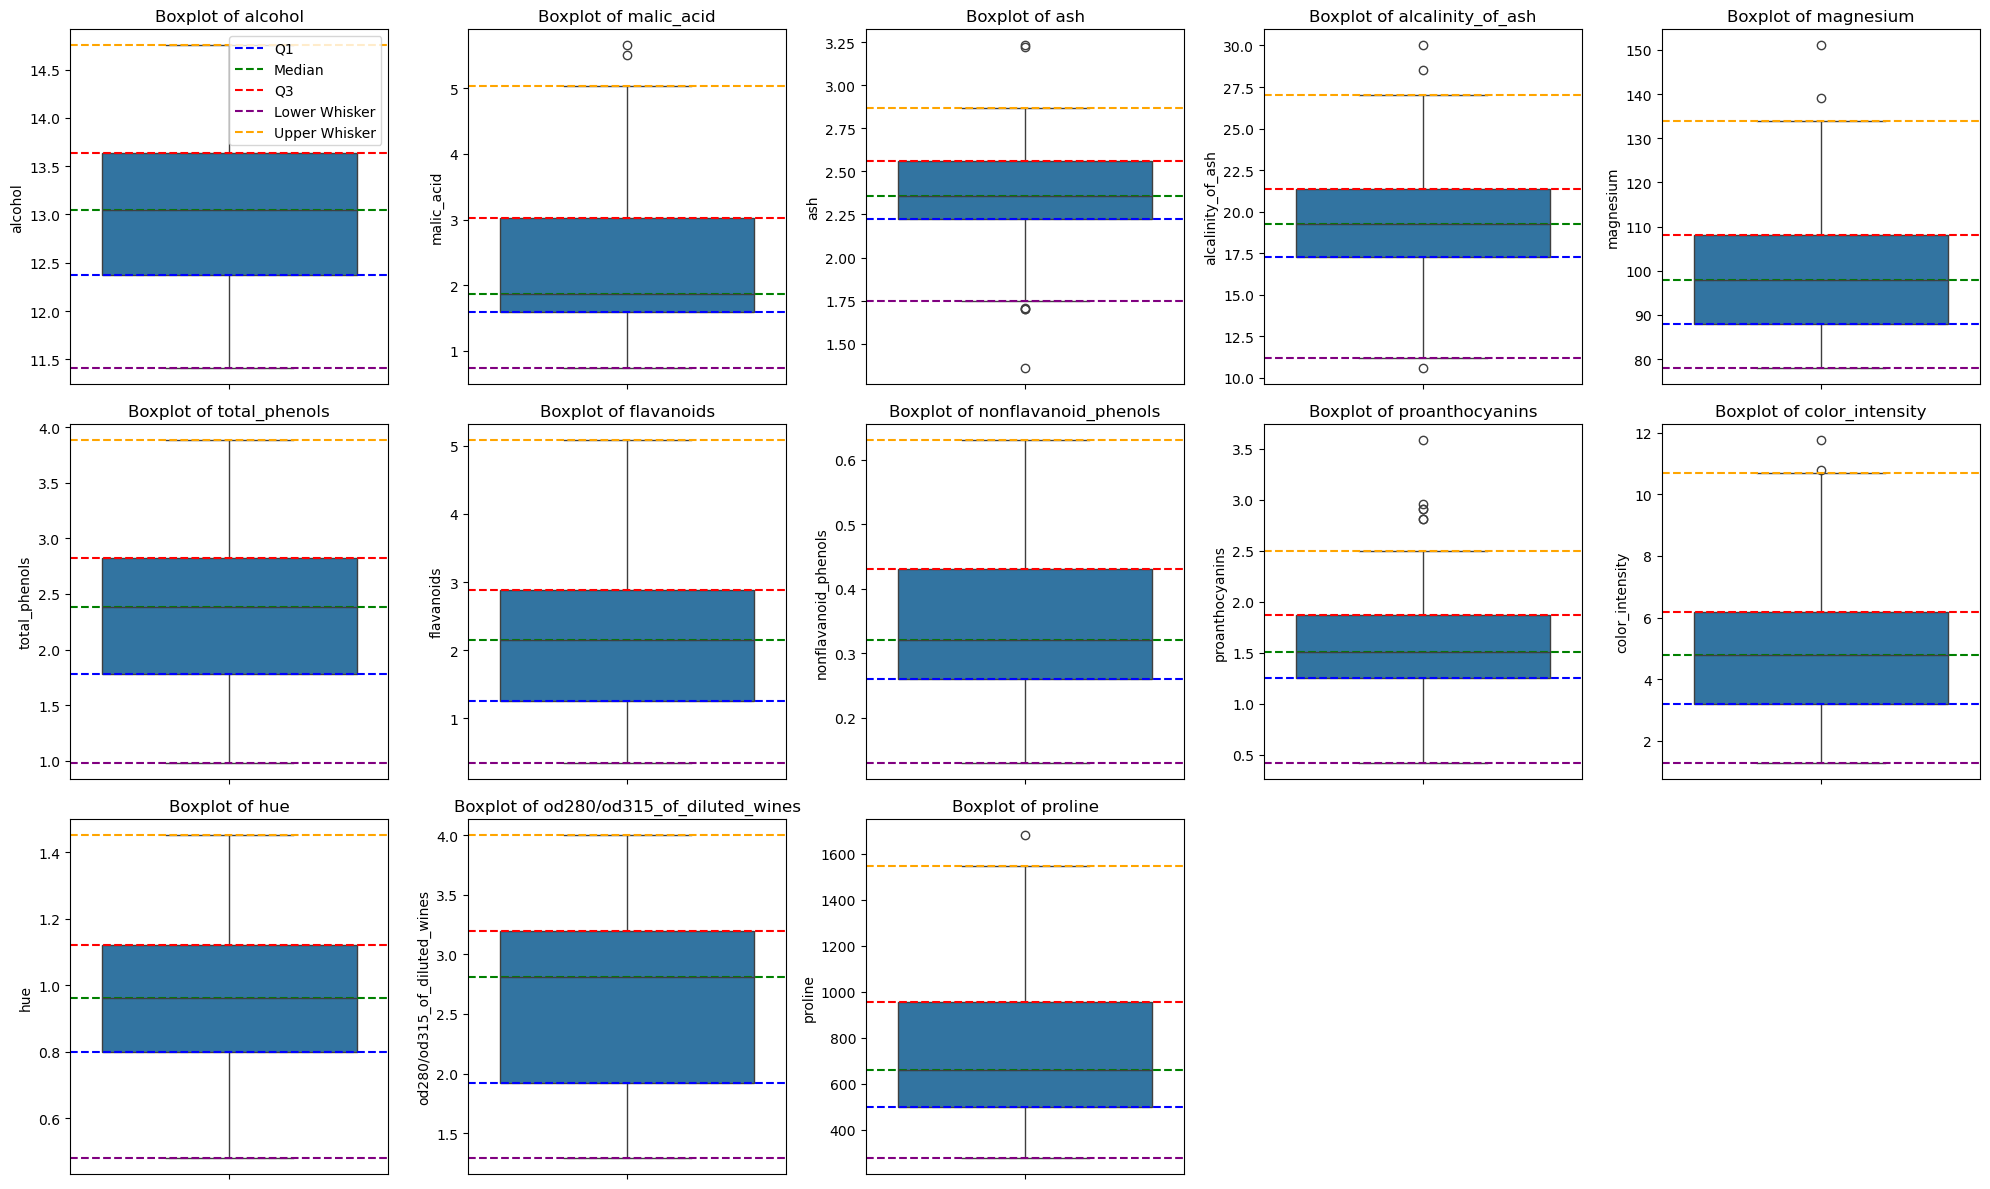

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
Median = train_df.median()
IQR = Q3 - Q1
LW = train_df[train_df >= Q1 - 1.5 * IQR].min()
UW = train_df[train_df <= Q3 + 1.5 * IQR].max()

for i, col in enumerate(train_df.columns[:-1]): 
    sns.boxplot(y=train_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].axhline(Q1[col], color='blue', linestyle='--', label='Q1')
    axes[i].axhline(Median[col], color='green', linestyle='--', label='Median')
    axes[i].axhline(Q3[col], color='red', linestyle='--', label='Q3')
    axes[i].axhline(LW[col], color='purple', linestyle='--', label='Lower Whisker')
    axes[i].axhline(UW[col], color='orange', linestyle='--', label='Upper Whisker')

axes[0].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])   
plt.tight_layout()
plt.show()  

These boxplots show the distribution of each feature in the Wine dataset.
The boxes represent the interquartile range (Q1 to Q3), the green line is the median, and the whiskers indicate the expected range of most values.

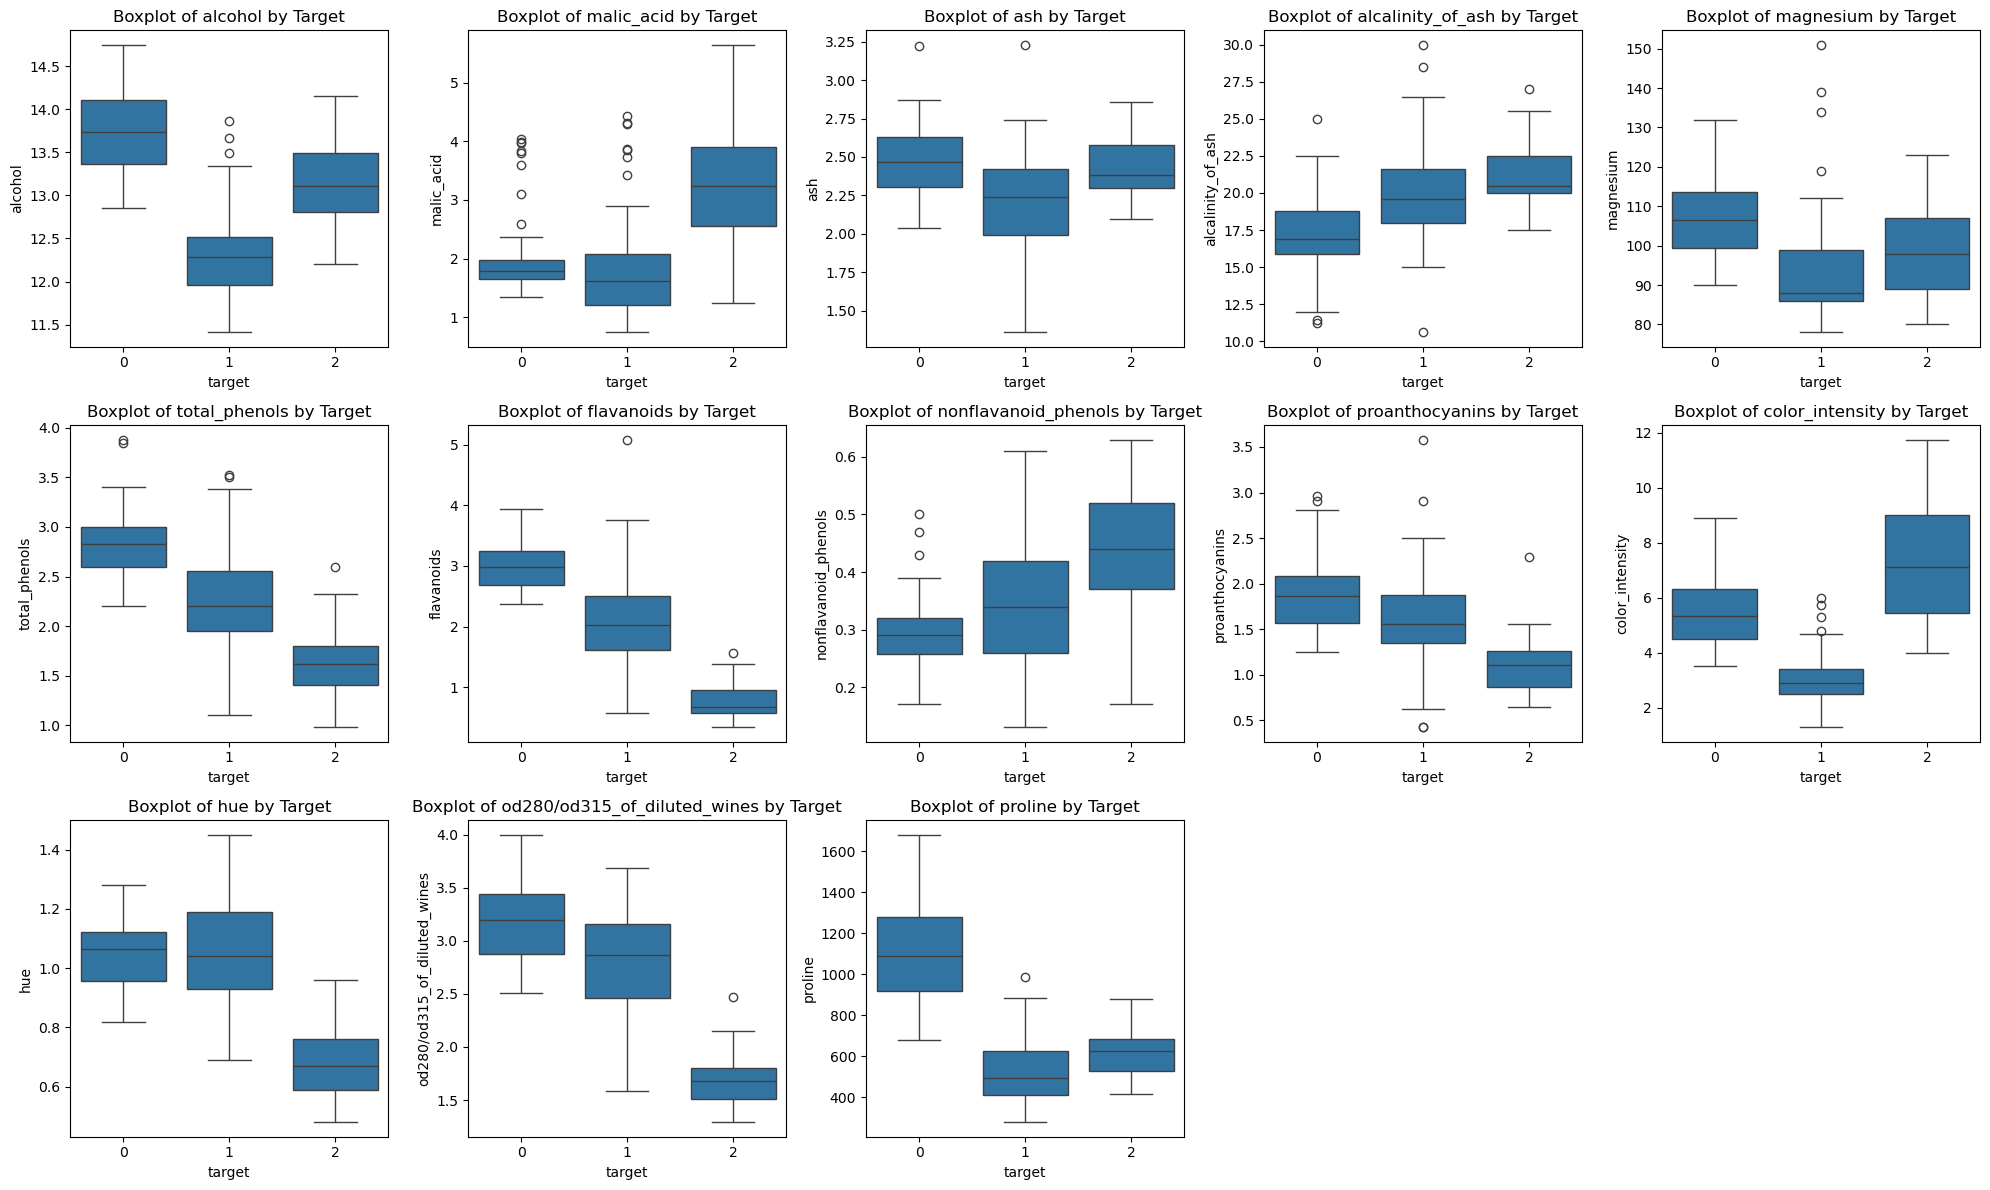

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[:-1]):
    sns.boxplot(x='target', y=col, data=train_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Target')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])   
plt.tight_layout()
plt.show()

This boxplot show the distribution of each feature in Wine dataset By target class.

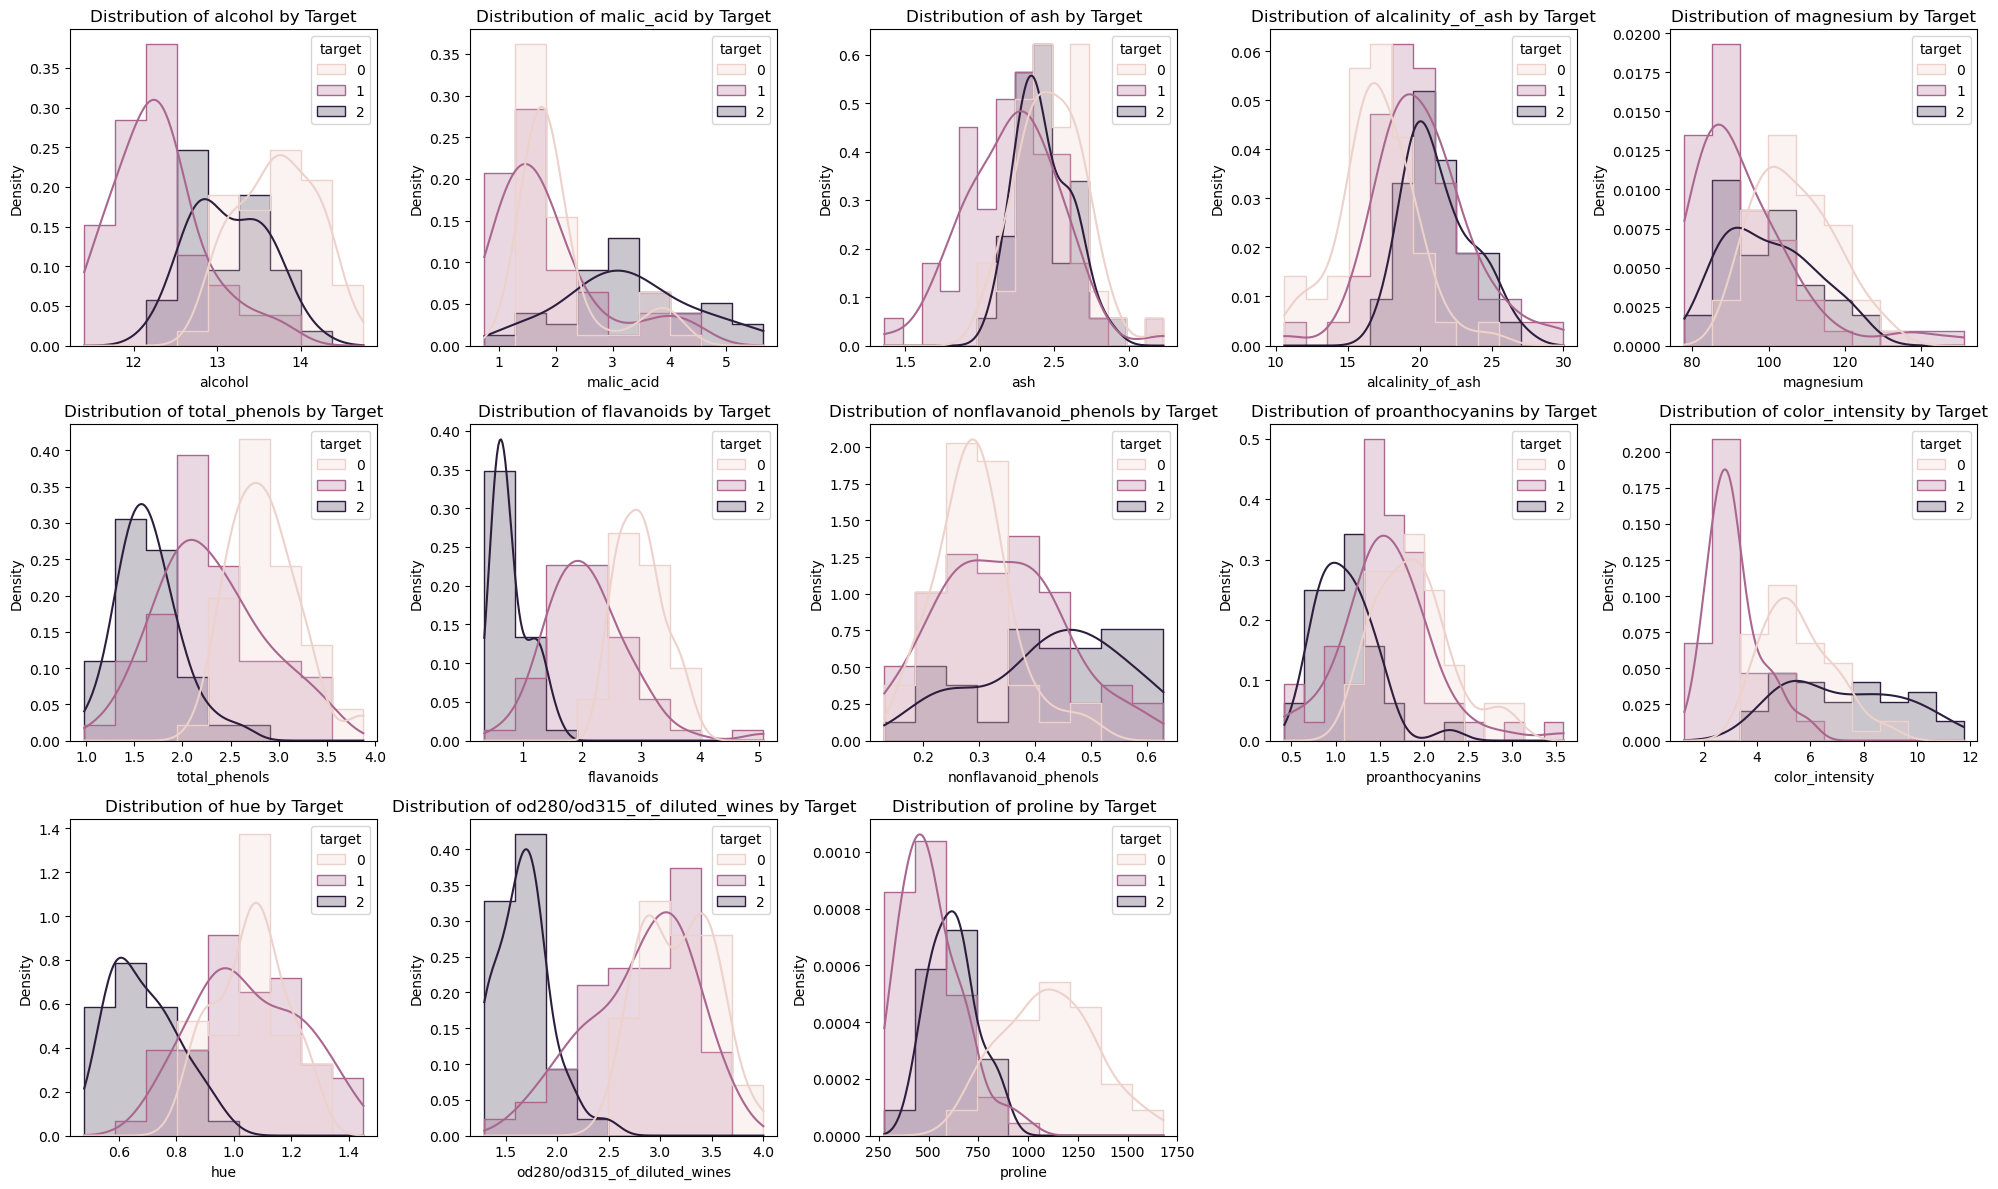

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[:-1]): 
    sns.histplot(data=train_df, x=col, hue='target', kde=True, ax=axes[i], element='step', stat='density')
    axes[i].set_title(f'Distribution of {col} by Target')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])   
plt.tight_layout()
plt.show()


Here we see tht distrbution of each feature by target class, with KDE to see better picture of distrbution

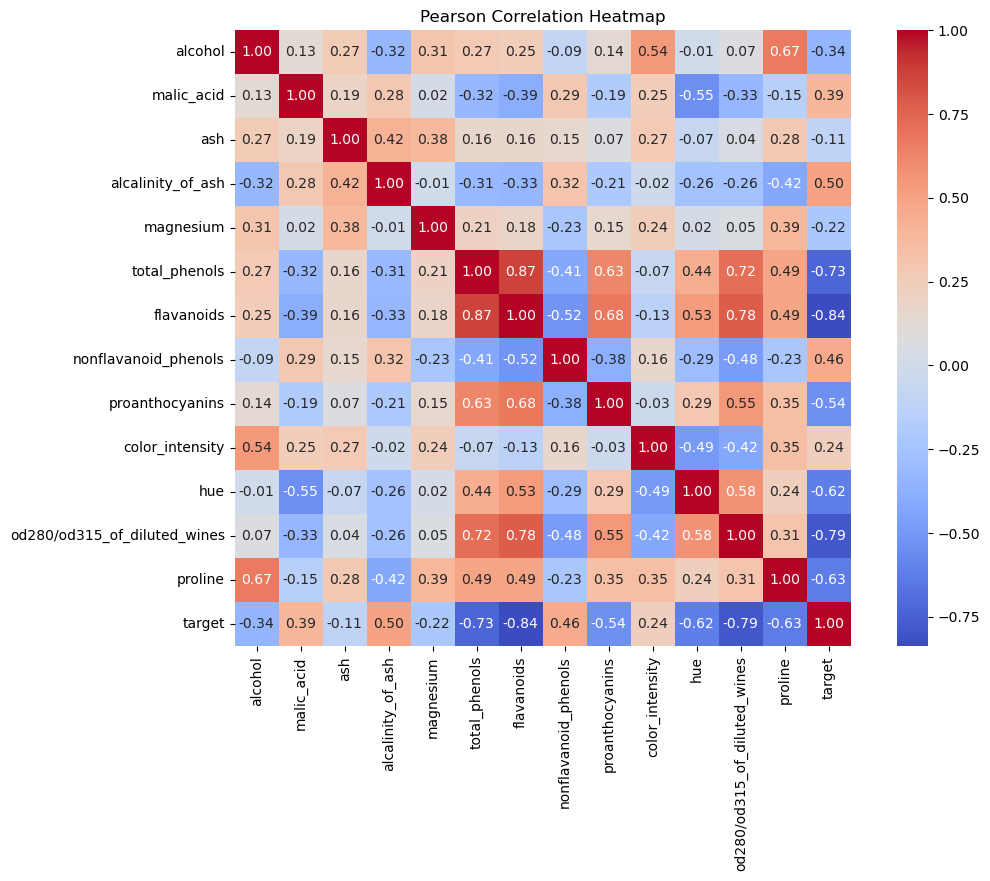

In [15]:
plt.figure(figsize=(12, 8))
corr = train_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

In this visualisation we see Pearson correlation table , which check linear corrleation between features

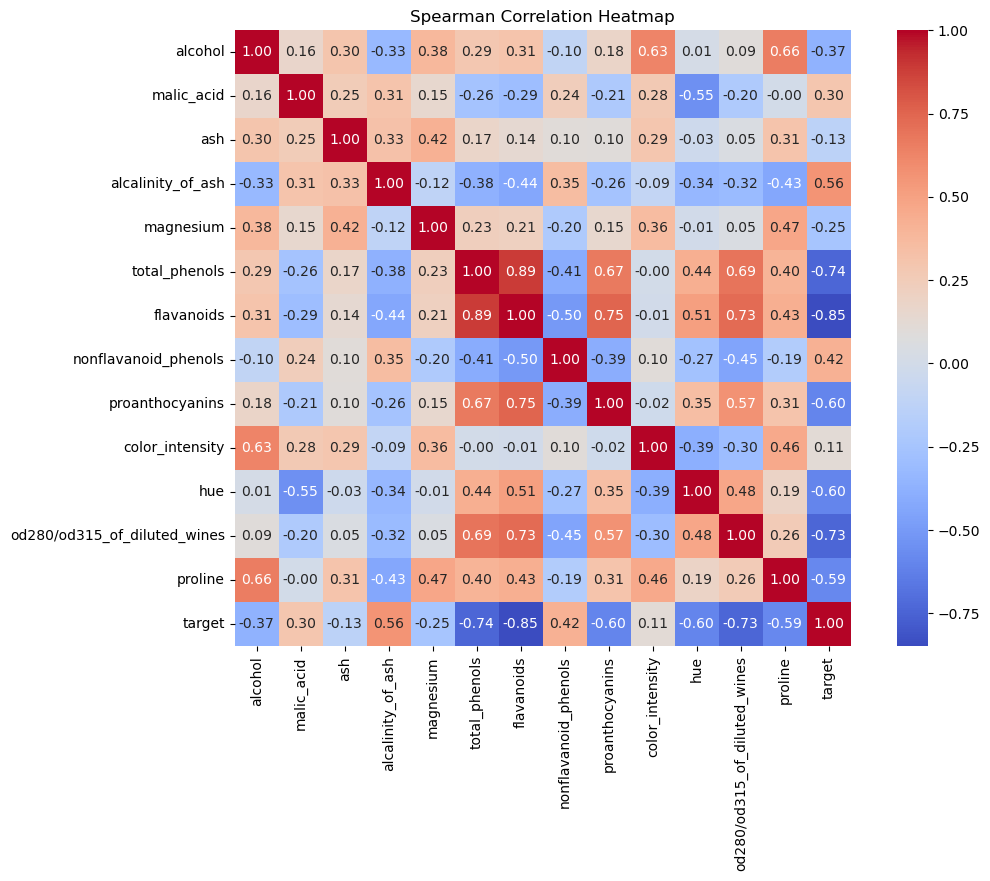

In [16]:
#spearman correlation heatmap
plt.figure(figsize=(12, 8))
corr = train_df.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap')
plt.show()

in this visualisation we see Spearman correlation , which check non linear connection between features

## Part 3 - Experiments
You could add as many code cells as needed

### Experimenting with grid search for logistic regression and random forest

In [18]:
scorer = make_scorer(f1_score, average="macro")
X_train = train_df.drop("target", axis=1)
y_train = train_df["target"]
X_test = test_df.drop("target", axis=1)
y_test = test_df["target"]

#### Logistic regression model

In [19]:
lr = Pipeline([
    ("scaler", StandardScaler()), 
    ("clf", LogisticRegression(max_iter=5000))
])
param_grid_lr = { 
    "clf__C": [0.1, 1.0],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "saga"]
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring=scorer)
grid_lr.fit(X_train, y_train);


#### Random Forest model

In [20]:
rf = Pipeline([
    ("scaler", StandardScaler()), 
    ("clf", RandomForestClassifier(random_state=42))
])
param_grid_rf = { 
    "clf__n_estimators": [50, 100],
    "clf__max_depth": [3, None]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring=scorer)
grid_rf.fit(X_train, y_train);

#### Results

In [21]:
print("\nLogistic Regression best params:", grid_lr.best_params_)
print("Best CV F1 (macro):", grid_lr.best_score_)
print("\nRandom Forest best params:", grid_rf.best_params_)
print("Best CV F1 (macro):", grid_rf.best_score_)


Logistic Regression best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV F1 (macro): 0.9787114845938376

Random Forest best params: {'clf__max_depth': None, 'clf__n_estimators': 50}
Best CV F1 (macro): 0.9787012987012986


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [22]:
if grid_rf.best_score_ > grid_lr.best_score_:
    best_model = grid_rf
else:
    best_model = grid_lr
    
print("\nSelected model:", type(best_model.best_estimator_["clf"]).__name__)

best_model.fit(X_train, y_train);


Selected model: LogisticRegression


## Part 5 - Apply on test and show model performance estimation

In [23]:
y_pred = best_model.predict(X_test)
print("\nClassification report:")
print(classification_report(y_test, y_pred))



Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [24]:
#first 5 predictions vs actual
print("First 5 predictions:", y_pred[:5])
print("First 5 actual:", y_test.values[:5])

First 5 predictions: [2 0 2 1 2]
First 5 actual: [2 0 2 1 2]
